In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [95]:
# Load dataset
df = pd.read_excel('Telco_customer_churn.xlsx')  # Replace with your dataset path

# Preview the dataset
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [96]:
# Check missing values before handling them
missing_values = df.isnull().sum()
print("Missing values per column before handling:")
print(missing_values[missing_values > 0])

Missing values per column before handling:
Churn Reason    5174
dtype: int64


In [97]:
# Drop 'Churn Reason' and 'lat long' columns as they are not useful for prediction
df.drop(columns=['Churn Reason','Lat Long'], inplace=True)

In [98]:
# Remove constant columns (columns with the same value in all rows)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_cols, inplace=True)

In [99]:
# Automatically detect and convert Yes/No columns to binary (1/0)
yes_no_cols = [col for col in df.columns if df[col].dropna().isin(['Yes', 'No']).all()]
df[yes_no_cols] = df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-99-1168795ed50e>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[yes_no_cols] = df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


In [100]:
# Automatically detect categorical columns (excluding binary Yes/No columns)
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col not in yes_no_cols]
# Convert all categorical values to strings to avoid mixed types
df[categorical_cols] = df[categorical_cols].astype(str)
# Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [101]:
# Added this line of code since this column eventho numeric was treated as on object
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [102]:
# Define features and target
X = df.drop(columns=['CustomerID', 'Churn Label','Churn Value'])  # Remove non-relevant columns
y = df['Churn Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Check if there are any non-numeric values left in X
non_numeric_data = X.select_dtypes(exclude=[np.number])
if not non_numeric_data.empty:
    print("Non-numeric columns found:")
    print(non_numeric_data.dtypes)
    print("Example values:")
    print(non_numeric_data.head())
else:
    print("All columns are numeric.")


All columns are numeric.


In [104]:
# Train Decision Tree model with regularization to reduce overfitting
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [105]:
# Make predictions
y_pred = model.predict(X_test)

In [106]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1009
           1       0.83      0.83      0.83       400

    accuracy                           0.90      1409
   macro avg       0.88      0.88      0.88      1409
weighted avg       0.90      0.90      0.90      1409



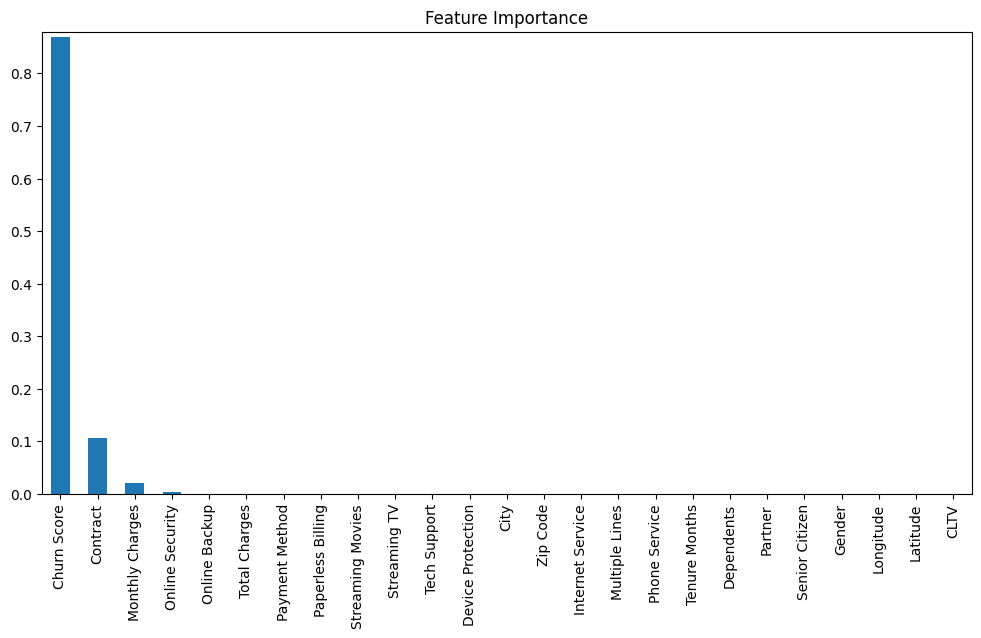

In [107]:
# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
if feature_importances.sum() > 0:  # Ensure there are non-zero importances
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importance')
    plt.ylim(0, max(feature_importances) + 0.01)  # Adjust y-axis scale for better visualization
    plt.show()
else:
    print("Feature importance values are all zero.")

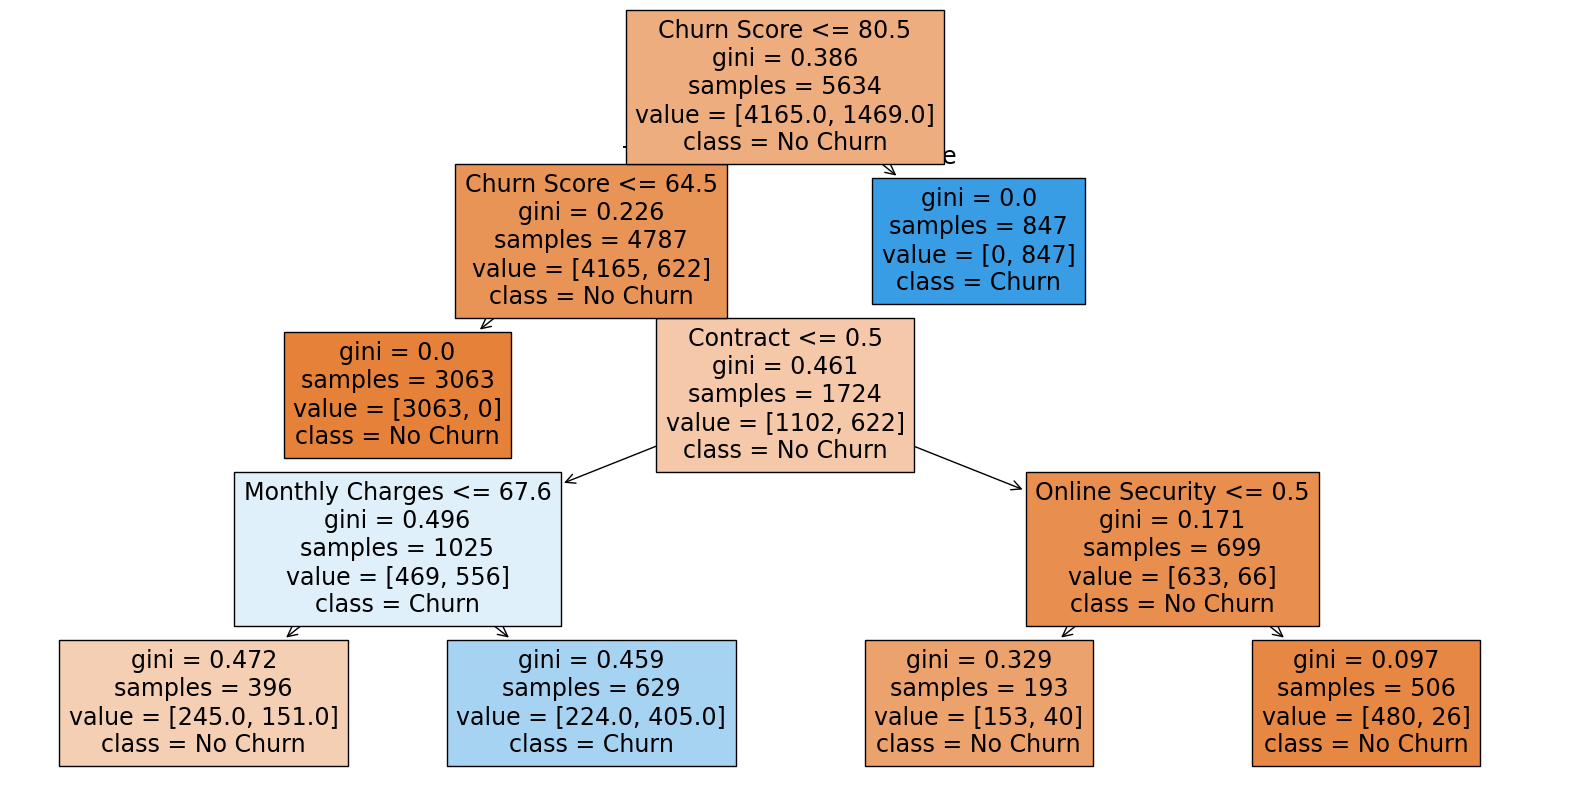

In [108]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [109]:
#Since that churn score is making this model work trivial we will redo the work without it and see for now
X = df.drop(columns=['CustomerID', 'Churn Label','Churn Value', 'Churn Score'])  # Remove non-relevant columns
y = df['Churn Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Train Decision Tree model with regularization to reduce overfitting
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [111]:
y_pred = model.predict(X_test)

In [112]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1009
           1       0.72      0.38      0.49       400

    accuracy                           0.78      1409
   macro avg       0.76      0.66      0.68      1409
weighted avg       0.77      0.78      0.76      1409



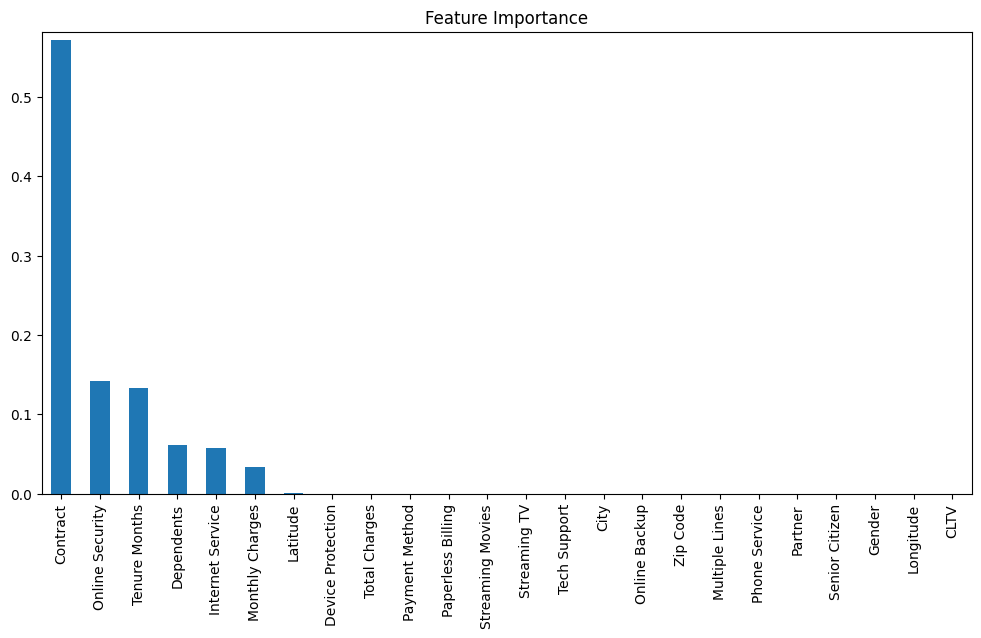

In [113]:
# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
if feature_importances.sum() > 0:  # Ensure there are non-zero importances
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importance')
    plt.ylim(0, max(feature_importances) + 0.01)  # Adjust y-axis scale for better visualization
    plt.show()
else:
    print("Feature importance values are all zero.")

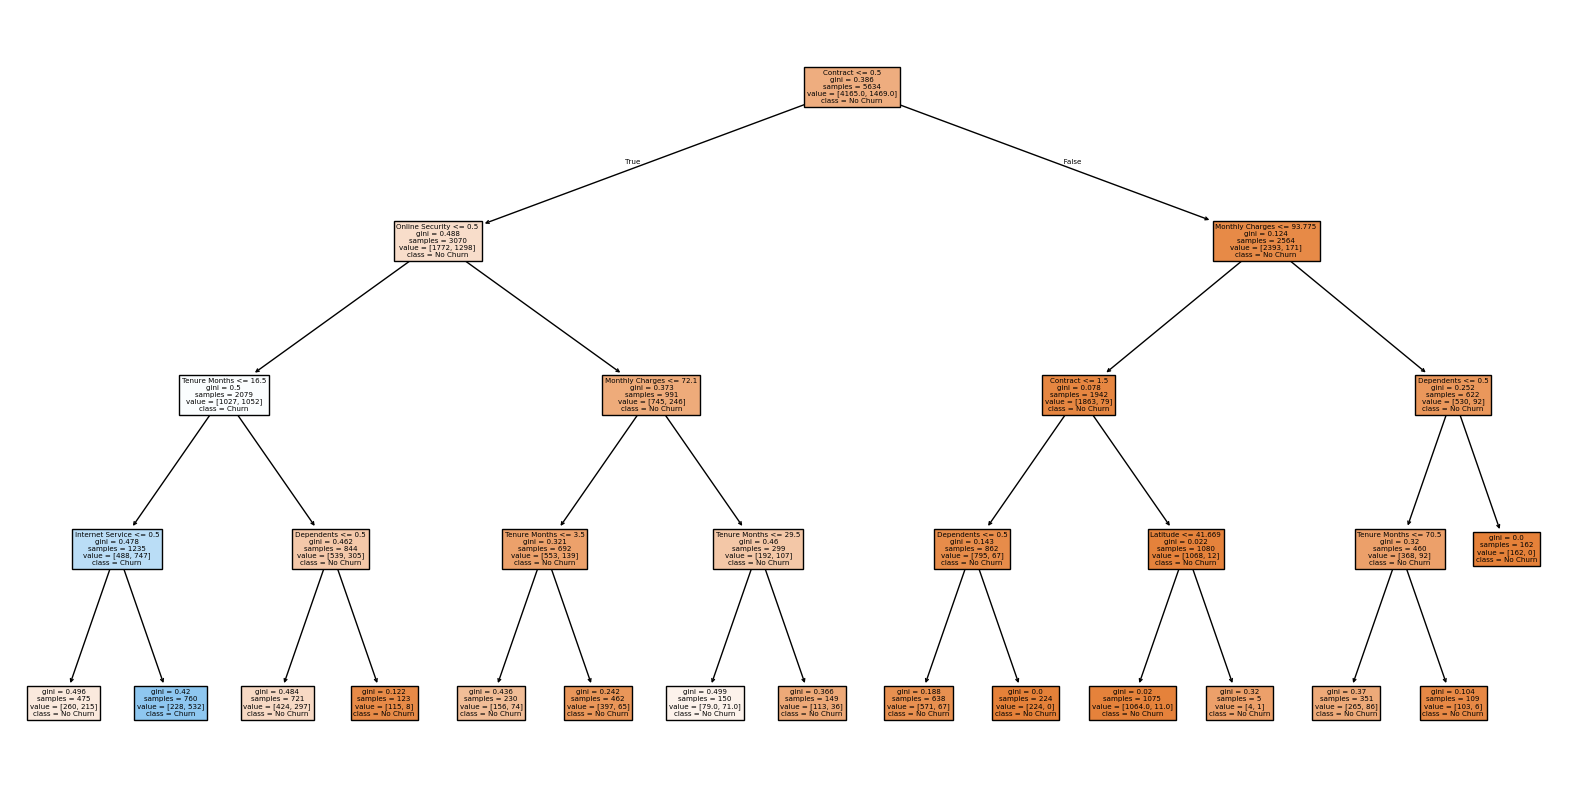

In [114]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [115]:
#Let's try fine tuning for this Decision Tree model
X = df.drop(columns=['CustomerID', 'Churn Label','Churn Value', 'Churn Score'])  # Remove non-relevant columns
y = df['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [117]:
# Get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [118]:
# Train Decision Tree model with best parameters
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=42)

In [119]:
# Make predictions
y_pred = model.predict(X_test)

In [120]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1009
           1       0.69      0.46      0.55       400

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.77      1409



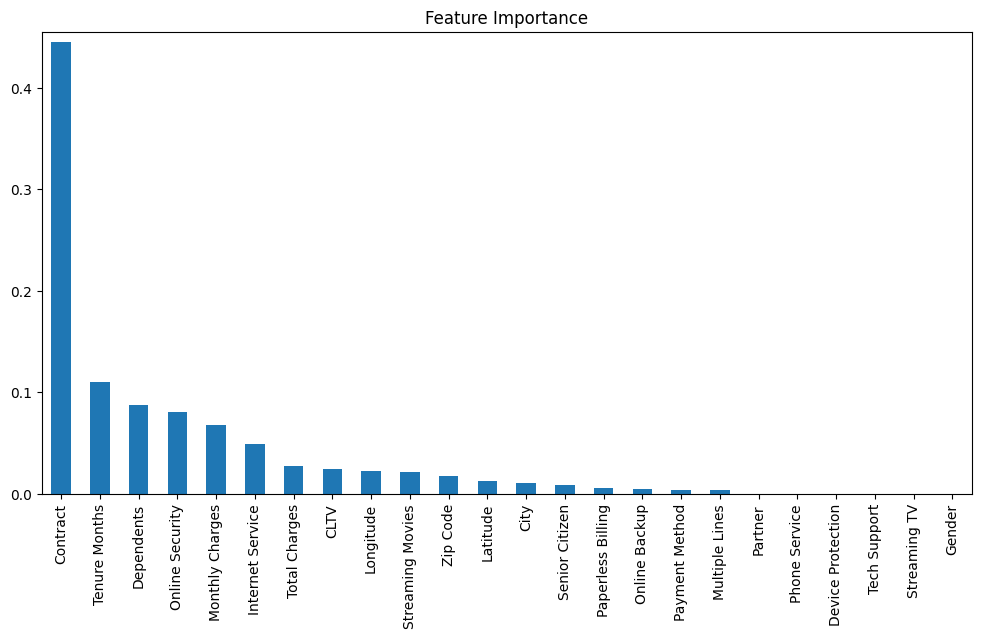

In [121]:
# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
if feature_importances.sum() > 0:  # Ensure there are non-zero importances
    feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importance')
    plt.ylim(0, max(feature_importances) + 0.01)  # Adjust y-axis scale for better visualization
    plt.show()
else:
    print("Feature importance values are all zero.")

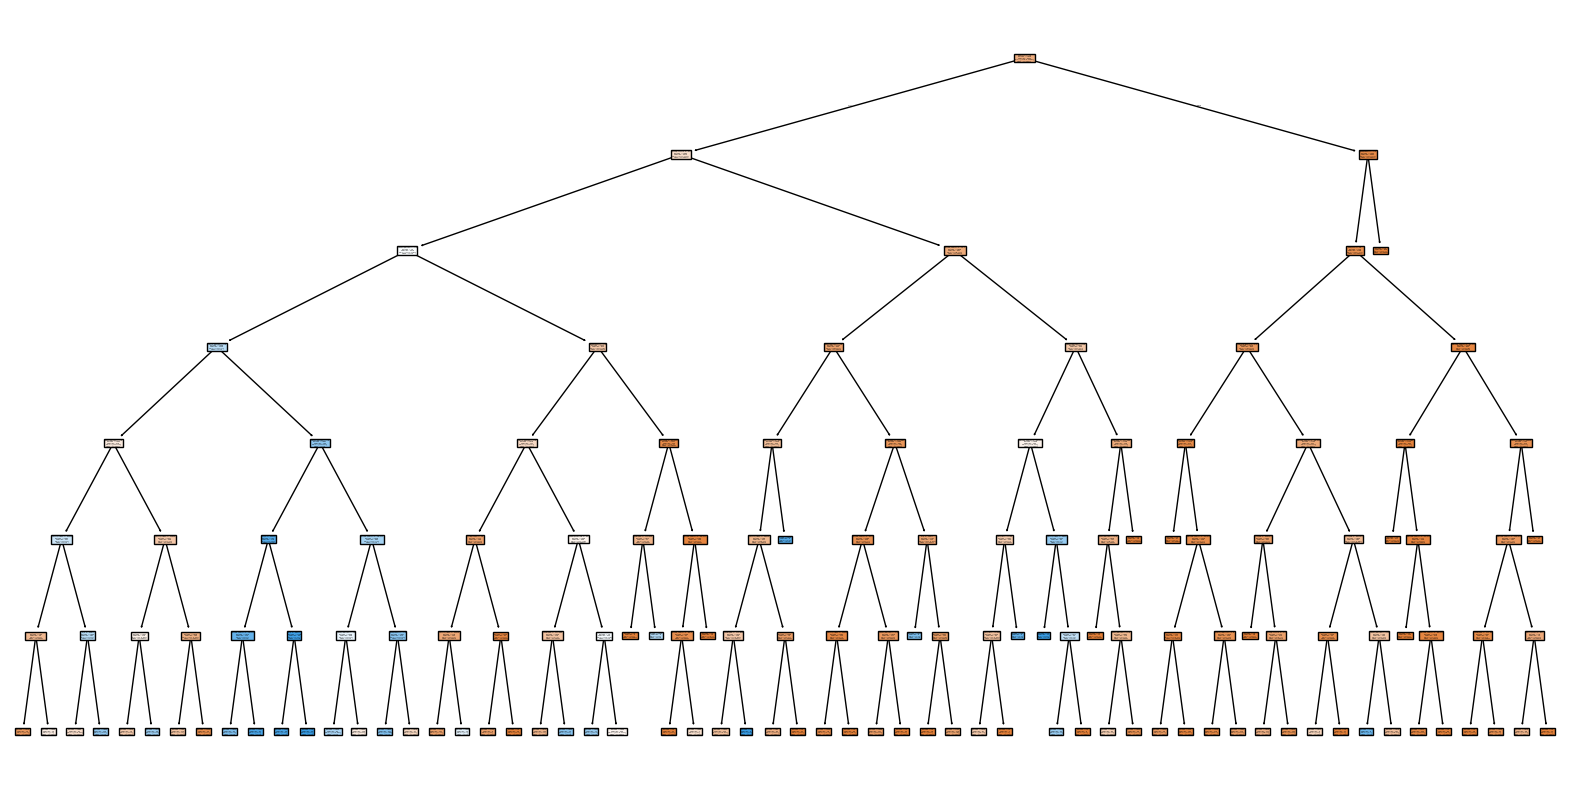

In [122]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()